## Part 1 - ConvNet2


In [ ]:
pip install -q kaggle

In [ ]:
#from google.colab import files 
#files.upload()

In [ ]:
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c 'dogs-vs-cats'
! mkdir train
! unzip dogs-vs-cats.zip
! unzip train.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/train/dog.5499.jpg  
  inflating: train/train/dog.55.jpg  
  inflating: train/train/dog.550.jpg  
  inflating: train/train/dog.5500.jpg  
  inflating: train/train/dog.5501.jpg  
  inflating: train/train/dog.5502.jpg  
  inflating: train/train/dog.5503.jpg  
  inflating: train/train/dog.5504.jpg  
  inflating: train/train/dog.5505.jpg  
  inflating: train/train/dog.5506.jpg  
  inflating: train/train/dog.5507.jpg  
  inflating: train/train/dog.5508.jpg  
  inflating: train/train/dog.5509.jpg  
  inflating: train/train/dog.551.jpg  
  inflating: train/train/dog.5510.jpg  
  inflating: train/train/dog.5511.jpg  
  inflating: train/train/dog.5512.jpg  
  inflating: train/train/dog.5513.jpg  
  inflating: train/train/dog.5514.jpg  
  inflating: train/train/dog.5515.jpg  
  inflating: train/train/dog.5516.jpg  
  inflating: train/train/dog.5517.jpg  
  inflating: train/train/dog.5518.jpg  
  inflating: train/train/dog.5519

In [ ]:
from tensorflow import keras
from keras import models
from keras import layers
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [ ]:
import os, shutil
 
os.mkdir('dogs-vs-cats')
# The path to the directory where the original dataset was uncompressed
original_dataset_dir = 'train/train'
 
# The directory where we will store our smaller dataset
base_dir = 'dogs-vs-cats/small'
os.mkdir(base_dir)
 
# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
 
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
 
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
 
# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
 
# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
 
# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
 
# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
# Copy first 1000 cat images to train_cats_dir
original_dataset_dir = 'train/train'
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
 
# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
 
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
 
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
 
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
 
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# network architecture

network = models.Sequential()
network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Flatten())
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
print(network.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# compilation

network.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001,), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Data preprocessing

base_dir = 'dogs-vs-cats/small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
 
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
#just model.fit in latest version
history = network.fit_generator(
      train_generator,
      steps_per_epoch= 100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps= 50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30
100/100 [==============================] - 25s 115ms/step - loss: 0.6911 - accuracy: 0.5300 - val_loss: 0.6729 - val_accuracy: 0.5870
Epoch 2/30
100/100 [==============================] - 11s 111ms/step - loss: 0.6578 - accuracy: 0.6140 - val_loss: 0.6775 - val_accuracy: 0.5550
Epoch 3/30
100/100 [==============================] - 11s 114ms/step - loss: 0.6154 - accuracy: 0.6715 - val_loss: 0.6137 - val_accuracy: 0.6620
Epoch 4/30
100/100 [==============================] - 11s 110ms/step - loss: 0.5679 - accuracy: 0.7015 - val_loss: 0.6327 - val_accuracy: 0.6470
Epoch 5/30
100/100 [==============================] - 11s 112ms/step - loss: 0.5362 - accuracy: 0.7260 - val_loss: 0.5823 - val_accuracy: 0.6840
Epoch 6/30
100/100 [==============================] - 12s 115ms/step - loss: 0.5076 - accuracy: 0.7510 - val_loss: 0.5968 - val_accuracy: 0.6750
Epoch 7/30
100/100 [==============================] - 11s 114ms/step - loss: 0.4830 - accuracy: 0.7660 - val_loss: 0.5818 - val_ac

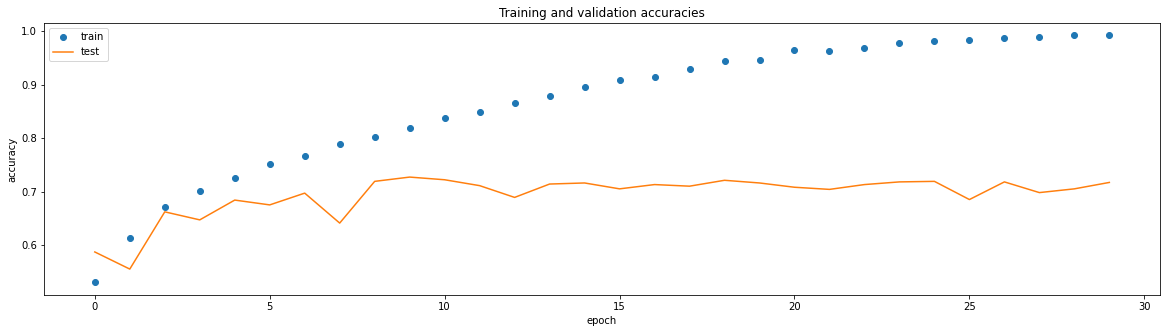

In [ ]:
# accuracy plot
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.plot(history.history['accuracy'], 'o')
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracies')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

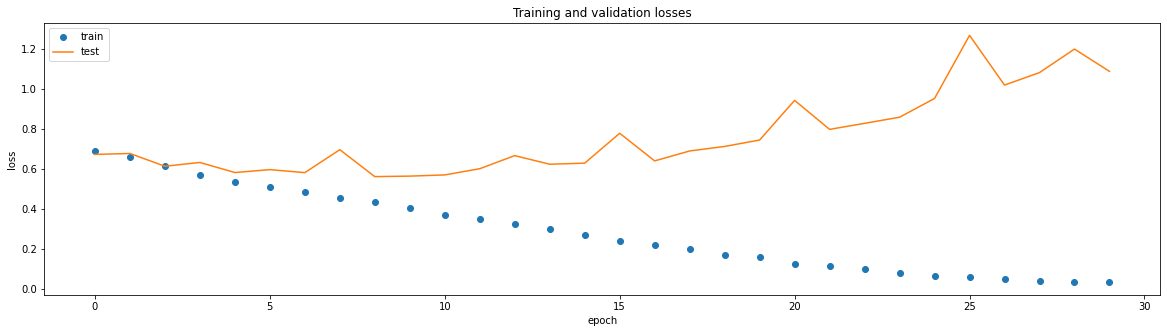

In [ ]:
# loss plot
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.plot(history.history['loss'], 'o')
plt.plot(history.history['val_loss'])
plt.title('Training and validation losses')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

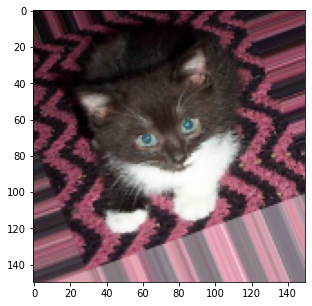

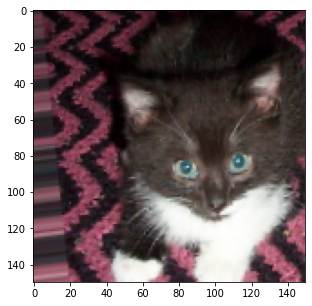

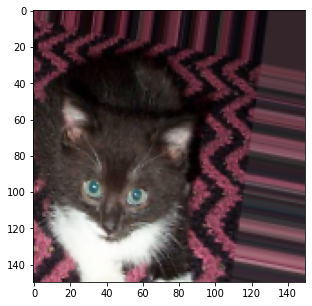

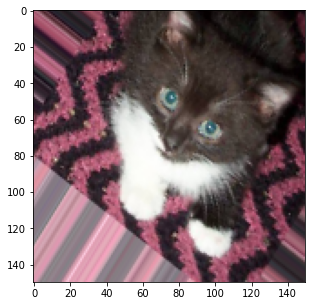

In [ ]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
 
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
 
# We pick one image to "augment"
img_path = fnames[3]
 
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))
 
# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
 
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)
 
# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
 
plt.show()

In [ ]:
train_datagen = datagen
 
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        # Set target directory:
        train_dir,
        # Resize images to 150x150 pixels:
        target_size=(150, 150),
        # Experiment with different batches:
        batch_size=20,
        # Labels needed for binary_crossentropy loss:
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
 
history = network.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
100/100 [==============================] - 21s 215ms/step - loss: 0.7725 - accuracy: 0.6550 - val_loss: 0.5624 - val_accuracy: 0.7010
Epoch 2/100
100/100 [==============================] - 21s 213ms/step - loss: 0.5977 - accuracy: 0.6770 - val_loss: 0.6222 - val_accuracy: 0.6840
Epoch 3/100
100/100 [==============================] - 22s 223ms/step - loss: 0.5860 - accuracy: 0.6950 - val_loss: 0.5467 - val_accuracy: 0.7090
Epoch 4/100
100/100 [==============================] - 22s 215ms/step - loss: 0.5601 - accuracy: 0.7120 - val_loss: 0.5403 - val_accuracy: 0.7140
Epoch 5/100
100/100 [==============================] - 22s 218ms/step - loss: 0.5708 - accuracy: 0.7000 - val_loss: 0.5436 - val_accuracy: 0.7240
Epoch 6/100
100/100 [==============================] - 21s 212ms/step - loss: 0.5472 - accuracy: 0.7200 - val_loss: 0.5026 - val_accuracy: 0.7370
Epoch 7/100
100/100 [==============================] - 21s 211ms/step - loss: 0.5480 - accuracy: 0.7200 - val_loss: 0.4901 -

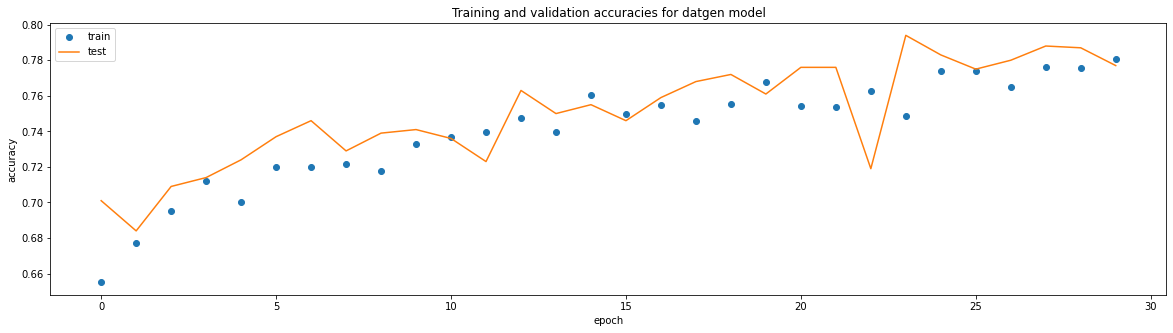

In [ ]:
# accuracy plot
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.plot(history.history['accuracy'][:30], 'o')
plt.plot(history.history['val_accuracy'][:30])
plt.title('Training and validation accuracies for datgen model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

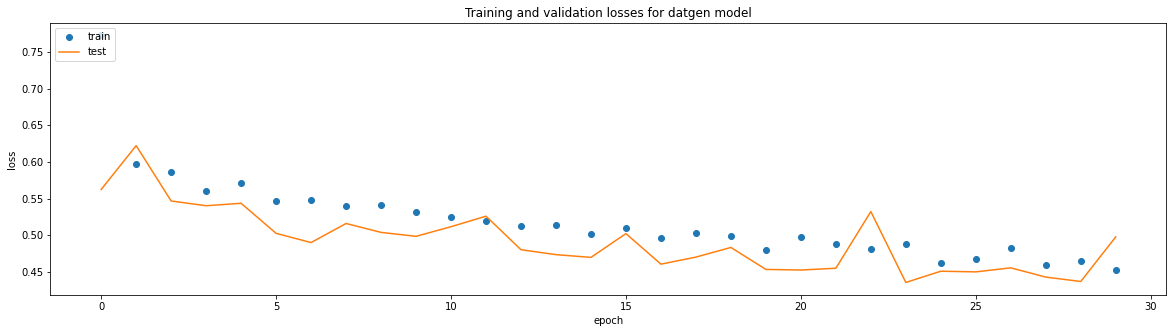

In [ ]:
# loss plot
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.plot(history.history['loss'][:30], 'o')
plt.plot(history.history['val_loss'][:30])
plt.title('Training and validation losses for datgen model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Part 2 - Transfer Learning

In [ ]:
from keras.applications.vgg16 import VGG16 
 
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
# summarize feature map shapes
for i in range(len(conv_base.layers)):
	layer = conv_base.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape    
	print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 150, 150, 64)
2 block1_conv2 (None, 150, 150, 64)
4 block2_conv1 (None, 75, 75, 128)
5 block2_conv2 (None, 75, 75, 128)
7 block3_conv1 (None, 37, 37, 256)
8 block3_conv2 (None, 37, 37, 256)
9 block3_conv3 (None, 37, 37, 256)
11 block4_conv1 (None, 18, 18, 512)
12 block4_conv2 (None, 18, 18, 512)
13 block4_conv3 (None, 18, 18, 512)
15 block5_conv1 (None, 9, 9, 512)
16 block5_conv2 (None, 9, 9, 512)
17 block5_conv3 (None, 9, 9, 512)


Final feature map shape is (9, 9, 512)

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
 
base_dir = 'dogs-vs-cats/small'
 
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
 
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [ ]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

In [ ]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# network architecture
from keras.layers import Dense, Dropout

network = models.Sequential()
network.add(layers.Flatten(input_shape=(4,4,512)))
network.add(Dense(256 ,activation='relu'))
network.add(Dropout(0.5))
network.add(Dense(1 ,activation='sigmoid'))

In [ ]:
network.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2097408   
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compilation

network.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.00002,), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = network.fit(
      train_features,
      train_labels,
      batch_size=20,
      epochs=30,
      validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 8ms/step - loss: 0.5954 - accuracy: 0.6790 - val_loss: 0.4489 - val_accuracy: 0.8410
Epoch 2/30
100/100 [==============================] - 1s 6ms/step - loss: 0.4272 - accuracy: 0.8110 - val_loss: 0.3682 - val_accuracy: 0.8620
Epoch 3/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3550 - accuracy: 0.8480 - val_loss: 0.3352 - val_accuracy: 0.8620
Epoch 4/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3248 - accuracy: 0.8650 - val_loss: 0.3030 - val_accuracy: 0.8810
Epoch 5/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2880 - accuracy: 0.8810 - val_loss: 0.2865 - val_accuracy: 0.8900
Epoch 6/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2721 - accuracy: 0.8900 - val_loss: 0.2768 - val_accuracy: 0.8900
Epoch 7/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2484 - accuracy: 0.9050 - val_loss: 0.2662 - val_accuracy: 0.8940
Epoch 

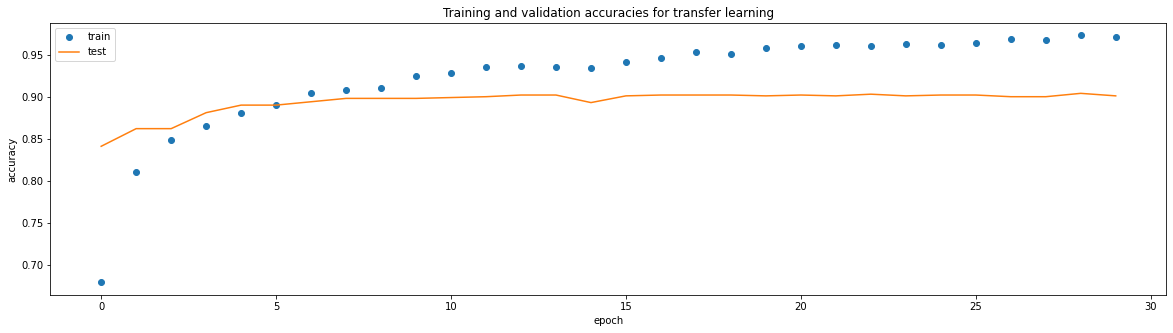

In [ ]:
# accuracy plot
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.plot(history.history['accuracy'], 'o')
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracies for transfer learning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

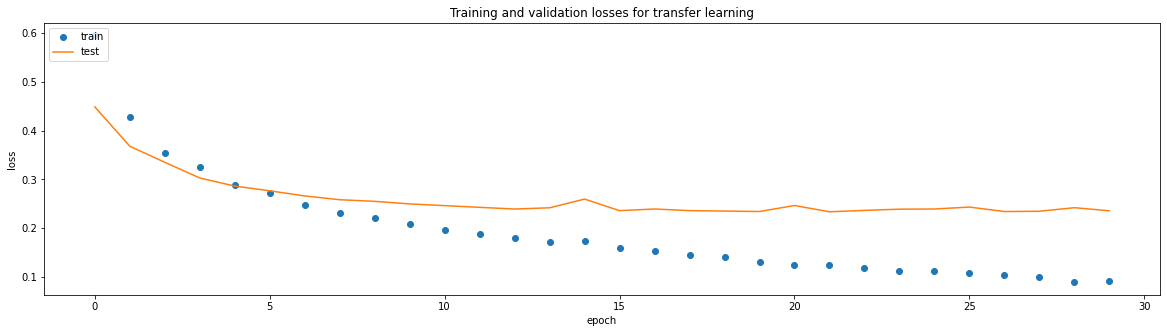

In [ ]:
# loss plot
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.plot(history.history['loss'], 'o')
plt.plot(history.history['val_loss'])
plt.title('Training and validation losses for transfer learning')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()